In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
pip install Quandl

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cryptocompare

Note: you may need to restart the kernel to use updated packages.


In [5]:
import quandl

In [6]:
import cryptocompare

In [7]:
import json

In [8]:
import requests

I'm using both the cryptocompare and Quandl API to import the relevant data

In [9]:
quandl.ApiConfig.api_key='N9vQgebCHLyo9-y2PkHP'

In [10]:
URL2= 'https://min-api.cryptocompare.com/data/v2/histoday?fsym=BTC&tsym=USD&limit=100&api_key=7fdd6a76832f296f9579100f25868ed7b30a5aed46915fdfe2e9c3c26a075879'

In [11]:
answer= requests.get(URL2)

In [12]:
yt=json.loads(answer.text)

In [13]:
import datetime

Import Bitcoin timeseries data from Cryptocompare

In [14]:
yt= cryptocompare.get_historical_price_day('BTC', 'USD', limit=249, exchange='CCCAGG', toTs=datetime.datetime(2014,1,1))

In [15]:
df = pd.DataFrame(data=yt, dtype=np.int8)

In [16]:
df

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,0,139.88,122.71,136.90,59881.87,7855443.65,128.00,direct,
1,-128,136.68,127.50,128.00,27523.74,3665399.85,134.44,direct,
2,0,149.08,133.00,134.44,70206.17,9987126.11,144.00,direct,
3,-128,146.93,134.00,144.00,65232.20,9124397.28,139.23,direct,
4,0,140.06,104.00,139.23,180008.97,21790982.26,116.38,direct,
...,...,...,...,...,...,...,...,...,...
245,-128,805.97,715.60,803.05,13341.62,10127883.44,761.99,direct,
246,0,803.95,734.98,761.99,7035.87,5448579.59,784.96,direct,
247,-128,818.83,780.96,784.96,10482.78,8411786.62,804.83,direct,
248,0,813.94,776.96,804.83,9167.06,7294004.88,805.94,direct,


In [17]:
yt= df.drop(['high','low','open','volumefrom','volumeto','conversionType','conversionSymbol','time'], axis=1)

In [18]:
yt

,close
0,128.00
1,134.44
2,144.00
3,139.23
4,116.38
...,...
245,761.99
246,784.96
247,804.83
248,805.94


In [19]:
import numpy as np

Importing GBP/ USD exchange rate from Quandl. This time series was chosen as it is reported 7 days a week opposed to 5 of regular stocks, this means that it matches the time period of the Bitcoin time series

In [20]:
xt= quandl.get('CUR/GBP', start_date='2014-01-01', end_date='2014-09-08')

In [21]:
xt.shape

(250, 1)

In [22]:
yt.shape

(250, 1)

In [23]:
yt

,close
0,128.00
1,134.44
2,144.00
3,139.23
4,116.38
...,...
245,761.99
246,784.96
247,804.83
248,805.94


In [24]:
xt

,RATE
DATE,
2014-01-01,0.603652
2014-01-02,0.608096
2014-01-03,0.609125
2014-01-04,0.609153
2014-01-05,0.609537
...,...
2014-09-04,0.607481
2014-09-05,0.612671
2014-09-06,0.612481


In [25]:
import matplotlib.pyplot as plt

After manipulating the data, I now transform it using logs

In [26]:
yt['BitcoinReturns']= np.log(yt['close']/df['close'].shift(1))

In [27]:
yt

,close,BitcoinReturns
0,128.00,NaN
1,134.44,0.049088
2,144.00,0.068695
3,139.23,-0.033686
4,116.38,-0.179267
...,...,...
245,761.99,-0.052484
246,784.96,0.029699
247,804.83,0.024998
248,805.94,0.001378


In [28]:
xt['GBP Returns']= np.log(xt['RATE']/xt['RATE'].shift(1))

In [29]:
xt

,RATE,GBP Returns
DATE,,
2014-01-01,0.603652,NaN
2014-01-02,0.608096,0.007335
2014-01-03,0.609125,0.001691
2014-01-04,0.609153,0.000046
2014-01-05,0.609537,0.000630
...,...,...
2014-09-04,0.607481,0.000594
2014-09-05,0.612671,0.008507
2014-09-06,0.612481,-0.000310


In [30]:
x2= xt.drop(columns=['RATE'])

In [31]:
y2= yt.drop(columns=['close'])

In [32]:
x3=x2.drop(x2.index[0])

In [33]:
y3=y2.drop(y2.index[0])

Converting the data frames to numpy arrays

In [34]:
x= x3.to_numpy()

In [35]:
y= y3.to_numpy()

Using the Numpy OLS method to calculate coefficients

In [36]:
beta = ((np.multiply(y, x)).mean()-np.mean(x)*np.mean(y))/((np.multiply(x, x)).mean()-np.mean(x)*np.mean(x))
alpha =np.mean(y)-beta*np.mean(x)
print("alpha =",alpha, "\nbeta =",beta)

alpha = 0.00746792238309582 
beta = -0.33430247379969463


In [37]:
y_hat = alpha + np.multiply(beta,x)
L = np.sum(np.multiply(y - y_hat,y - y_hat))
L

1.2537743290470926

Using the Gradient Descent method, OLS is the calculated again

In [38]:
def  cal_cost(alpha,beta,x,y):
        n = len(y)
        predictions = alpha + np.multiply(beta,x)
        cost = (1/2*n) * np.sum(np.square(predictions-y))
        return cost

In [39]:
cal_cost(alpha,beta,x,y)

156.09490396636303

In [40]:
cal_cost(10,beta,x,y)

3095577.6372409146

In [41]:
iterations = 500
learningrate = 0.01
beta0 = -11
beta1 = 0
n = len(y)
index = np.arange(1, iterations+1, 1).reshape((iterations, 1))

loss_history = np.zeros((iterations,1))
beta0_history = np.zeros((iterations,1))
beta1_history = np.zeros((iterations,1))

for i in range(iterations):
       
        prediction = beta0 + np.multiply(beta1,x)
        residuals = y-prediction
        residuals_sum = sum(residuals)
        beta0_gradient = -(1/n)*residuals_sum*(learningrate)
        beta0 = beta0 - beta0_gradient
        beta0_history[i] = beta0
    
        residuals_x = np.multiply(residuals,x)
        residuals_x_sum = sum(residuals_x)
        beta1_gradient = -(1/n)*residuals_x_sum*(learningrate)
        beta1 = beta1 - beta1_gradient
        beta1_history[i] = beta1
    
        loss_history[i] = cal_cost(beta0,beta1,x,y)

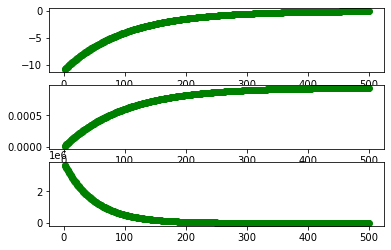

In [42]:
plt.subplot(311)
plt.plot(index, beta0_history,'go')
plt.subplot(312)
plt.plot(index, beta1_history,'go')
plt.subplot(313)
plt.plot(index, loss_history,'go')

In [43]:
beta1

array([0.00093492])

In [44]:
beta0

array([-0.06488527])